# Load Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [2]:
import os
path=os.listdir('C:/Users/psvys/Downloads/archive/Training/')
print(path)
classes={'notumor':0,'pituitary':1}
print(classes)


['notumor', 'pituitary']
{'notumor': 0, 'pituitary': 1}


In [3]:
import cv2
X=[]
Y=[]
for cls in classes:
    pth='C:/Users/psvys/Downloads/archive/Training/'+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])
        #'C:/Users/psvys/Downloads/archive/Training/notumorno_tumorno_tumor'

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
X=np.array(X)
Y=np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    1595
1    1457
dtype: int64

In [7]:
X.shape

(3052, 200, 200)

# visualize data 

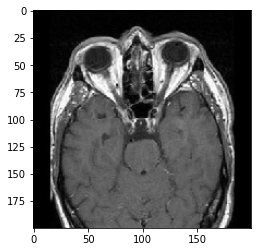

In [8]:
plt.imshow(X[0],cmap='gray')

# Prepare data

In [9]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(3052, 40000)

# split  data

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.20)

In [11]:
xtrain.shape,xtest.shape

((2441, 40000), (611, 40000))

# Feature scaling

In [12]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature selection:PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape,xtest.shape)
pca=PCA(.98)
pca_train=xtrain
pca_test=xtest

(2441, 40000) (611, 40000)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [17]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

# Evaluation

In [18]:
print("Traning Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))

Traning Score: 1.0
Testing Score: 0.9787234042553191


In [19]:
print("Traning Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Traning Score: 0.9938549774682507
Testing Score: 0.983633387888707


# Prediction

In [20]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([  7,  83,  99, 247, 262, 284, 333, 468, 485, 550], dtype=int64),)

In [21]:
pred[7]

0

In [22]:
ytest[7]

1

# Test model

In [23]:
dec={0:'No Tumor',1:'Positive Tumor'}

# Testing - notumor

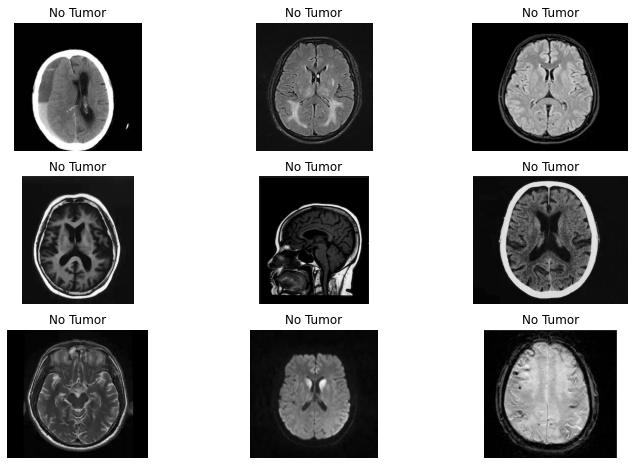

In [24]:

plt.figure(figsize=(12,8))
p=os.listdir()
c=1
for i in os.listdir('C:/Users/psvys/Downloads/archive/Testing/notumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread('C:/Users/psvys/Downloads/archive/Testing/notumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

# Testing - pituitary

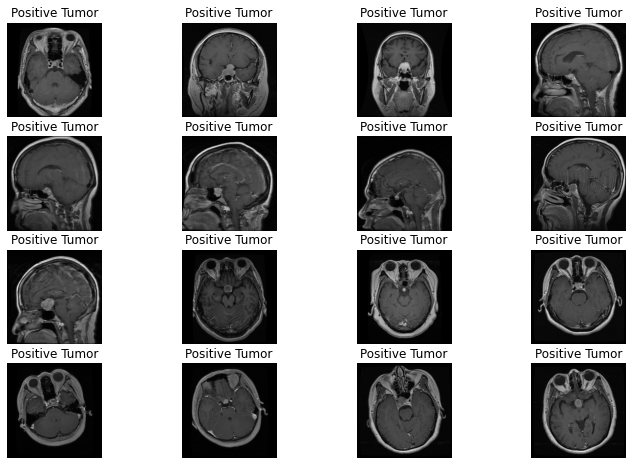

In [30]:
plt.figure(figsize=(12,8)) 
p=os.listdir() 
c=1 
for i in os.listdir('C:/Users/psvys/Downloads/archive/Testing/pituitary/')[:16]:

    plt.subplot(4,4,c)
    img=cv2.imread('C:/Users/psvys/Downloads/archive/Testing/pituitary/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

# Training - notumor

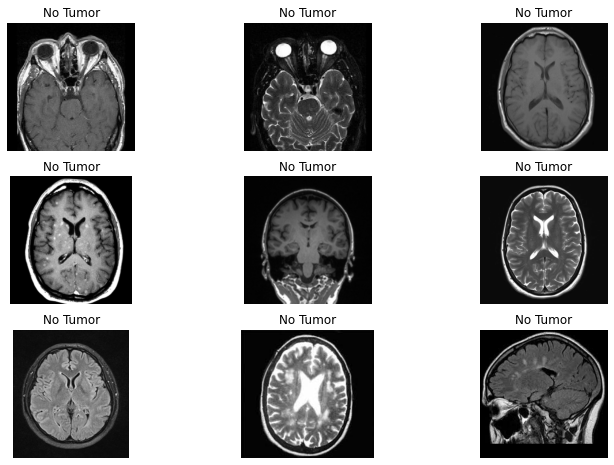

In [26]:
plt.figure(figsize=(12,8))
p=os.listdir()
c=1
for i in os.listdir('C:/Users/psvys/Downloads/archive/Training/notumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread('C:/Users/psvys/Downloads/archive/Training/notumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

# Training - pituitary

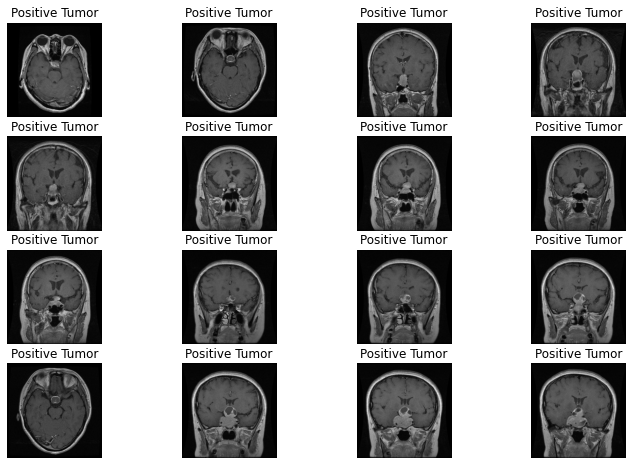

In [31]:
plt.figure(figsize=(12,8))
p=os.listdir()
c=1
for i in os.listdir('C:/Users/psvys/Downloads/archive/Training/pituitary/')[:16]:

    plt.subplot(4,4,c)
    img=cv2.imread('C:/Users/psvys/Downloads/archive/Training/pituitary/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

# Testing - P&T

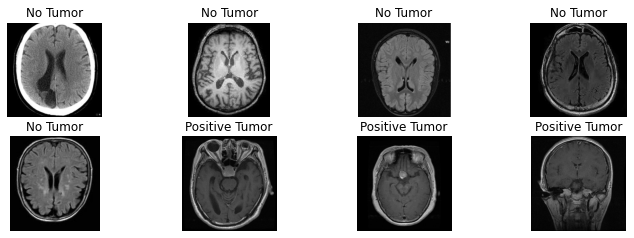

In [28]:
plt.figure(figsize=(12,8))
p=os.listdir()
c=1
for i in os.listdir('C:/Users/psvys/Downloads/archive/Testing/P&T/')[:8]:

    plt.subplot(4,4,c)
    img=cv2.imread('C:/Users/psvys/Downloads/archive/Testing/P&T/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1